In [ ]:
# var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
# var hiddenElement = document.createElement('a');
# hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
# hiddenElement.target = '_blank';
# hiddenElement.download = 'myFile.txt';
# hiddenElement.click();

In [1]:
from pathlib import Path
from fastai import *
from fastai.vision import *

In [2]:
folder = 'black'
file = 'urls_black.txt'

In [5]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [8]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [9]:
path = Path('/home/home/Documents/fastai')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
download_images(path/file, dest, max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [11]:
classes = ['teddys', 'grizzly', 'black']

In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

teddys


grizzly


black


In [13]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['black', 'grizzly', 'teddys']

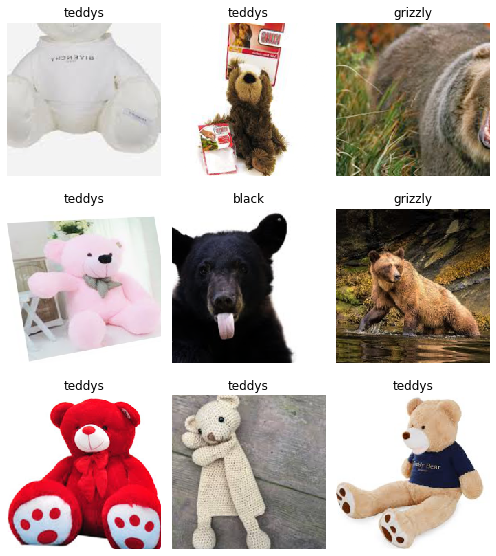

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 384, 96)

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/home/snap/codium/common/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 24.8MB/s]


In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.179428,0.033922,0.010417,01:09
1,0.635023,0.049048,0.020833,01:09
2,0.435254,0.048882,0.010417,01:09
3,0.321821,0.055331,0.020833,01:13


In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


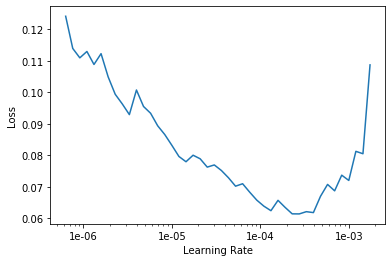

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.066781,0.047002,0.031250,02:21
1,0.068505,0.066608,0.031250,02:15


In [27]:
learn.save('stage-2')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

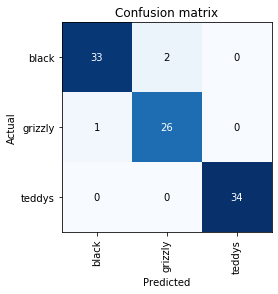

In [29]:
interp.plot_confusion_matrix()

In [38]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [40]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [41]:
np.random.seed(42)
db = (ImageList.from_df(df, path)
                   .split_none()
                   .label_from_df()
                   .databunch(bs=64))

You can deactivate this warning by passing `no_check=True`.


In [45]:
data.classes

['black', 'grizzly', 'teddys']

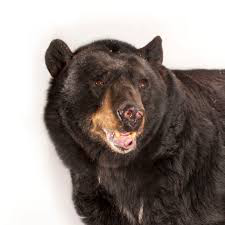

In [46]:
img = open_image(path/'black'/'00000021.jpg')
img

In [49]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black